In [1]:
import pandas as pd
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_data = pd.read_csv('train.csv')

df_train = pd.read_csv('train.csv')

df_train.columns

# X = train_data[['MSSubClass','LotFrontage','LotArea']]
# y = train_data['SalePrice']

# X = X.fillna(0)

# test_data = pd.read_csv('test.csv')
# z = test_data[['MSSubClass','LotFrontage','LotArea']]

# z = z.fillna(0)

# 1460 rows × 80 columns
# model = DecisionTreeClassifier()
# model.fit(X, y)
# predictions = model.predict(z)
# predictions

# train_data['MSZoning'].value_counts()

# df = pd.read_csv('music.csv')
# X = df.drop(columns=['genre'])
# y = df['genre']

# model = DecisionTreeClassifier()
# model.fit(X, y)
# predictions = model.predict([[21, 1], [22, 0]])
# predictions

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [2]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


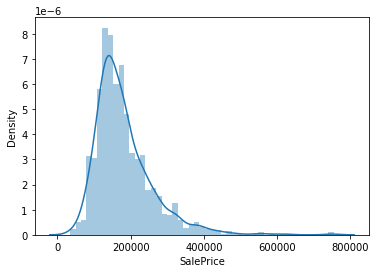

In [4]:
#histogram
sns.distplot(df_train['SalePrice']);

In [5]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

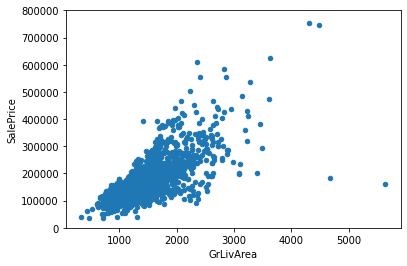

In [6]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

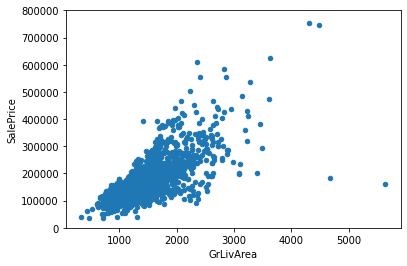

In [7]:
df_train.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

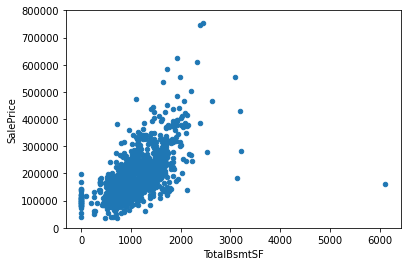

In [8]:
df_train.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

(-0.5, 9.5, -1105.0, 800000.0)

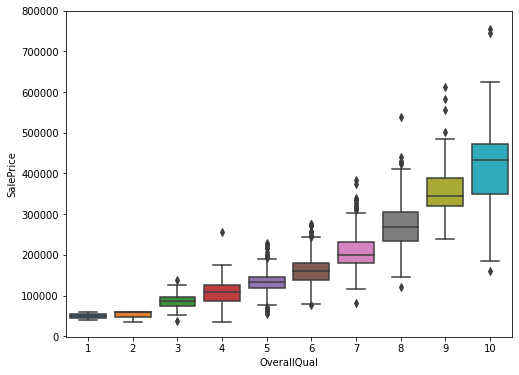

In [9]:
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=df_train)
fig.axis(ymax=800000)

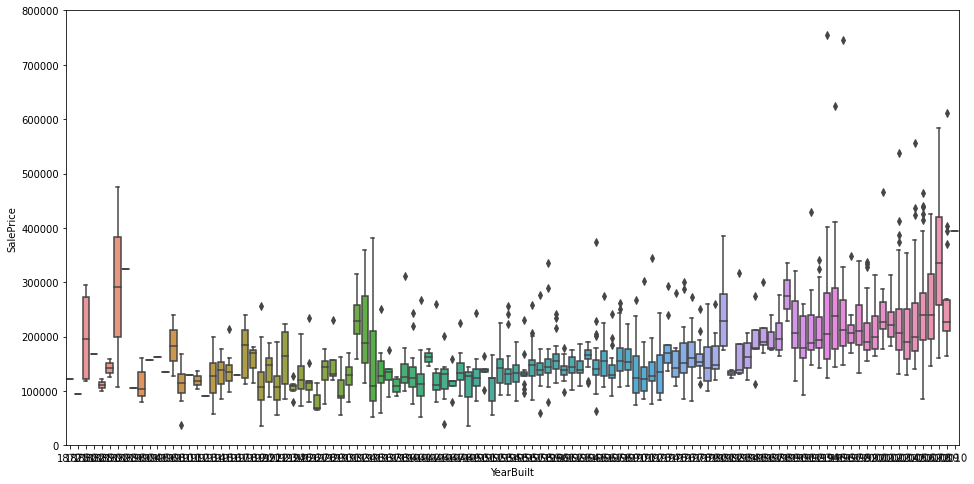

In [10]:
plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=1);

<AxesSubplot:>

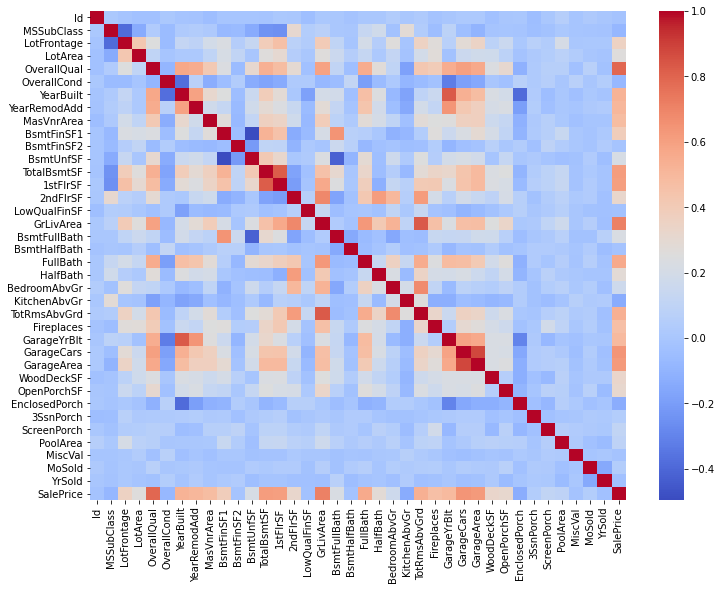

In [11]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_train.corr(), cmap = "coolwarm")

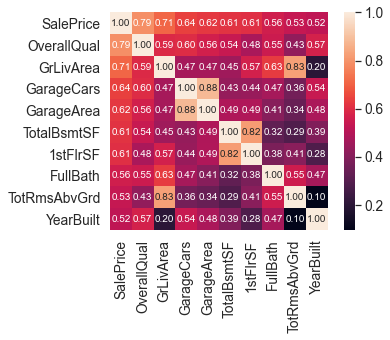

In [12]:
import numpy as np

k = 10
corrmat = df_train.corr()
corrmat
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot = True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:>

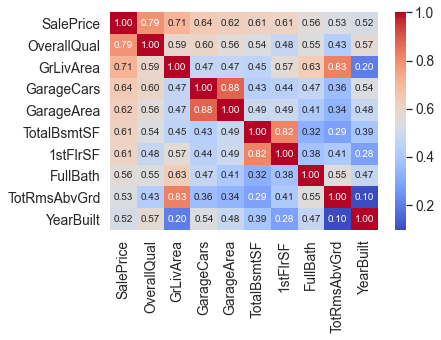

In [13]:
#same as above heatmap, but much faster and easier to use seaborn than matlib or numpy
sns.heatmap(df_train[cols].corr(),annot=True, cmap = "coolwarm", fmt='.2f',annot_kws={'size': 10})

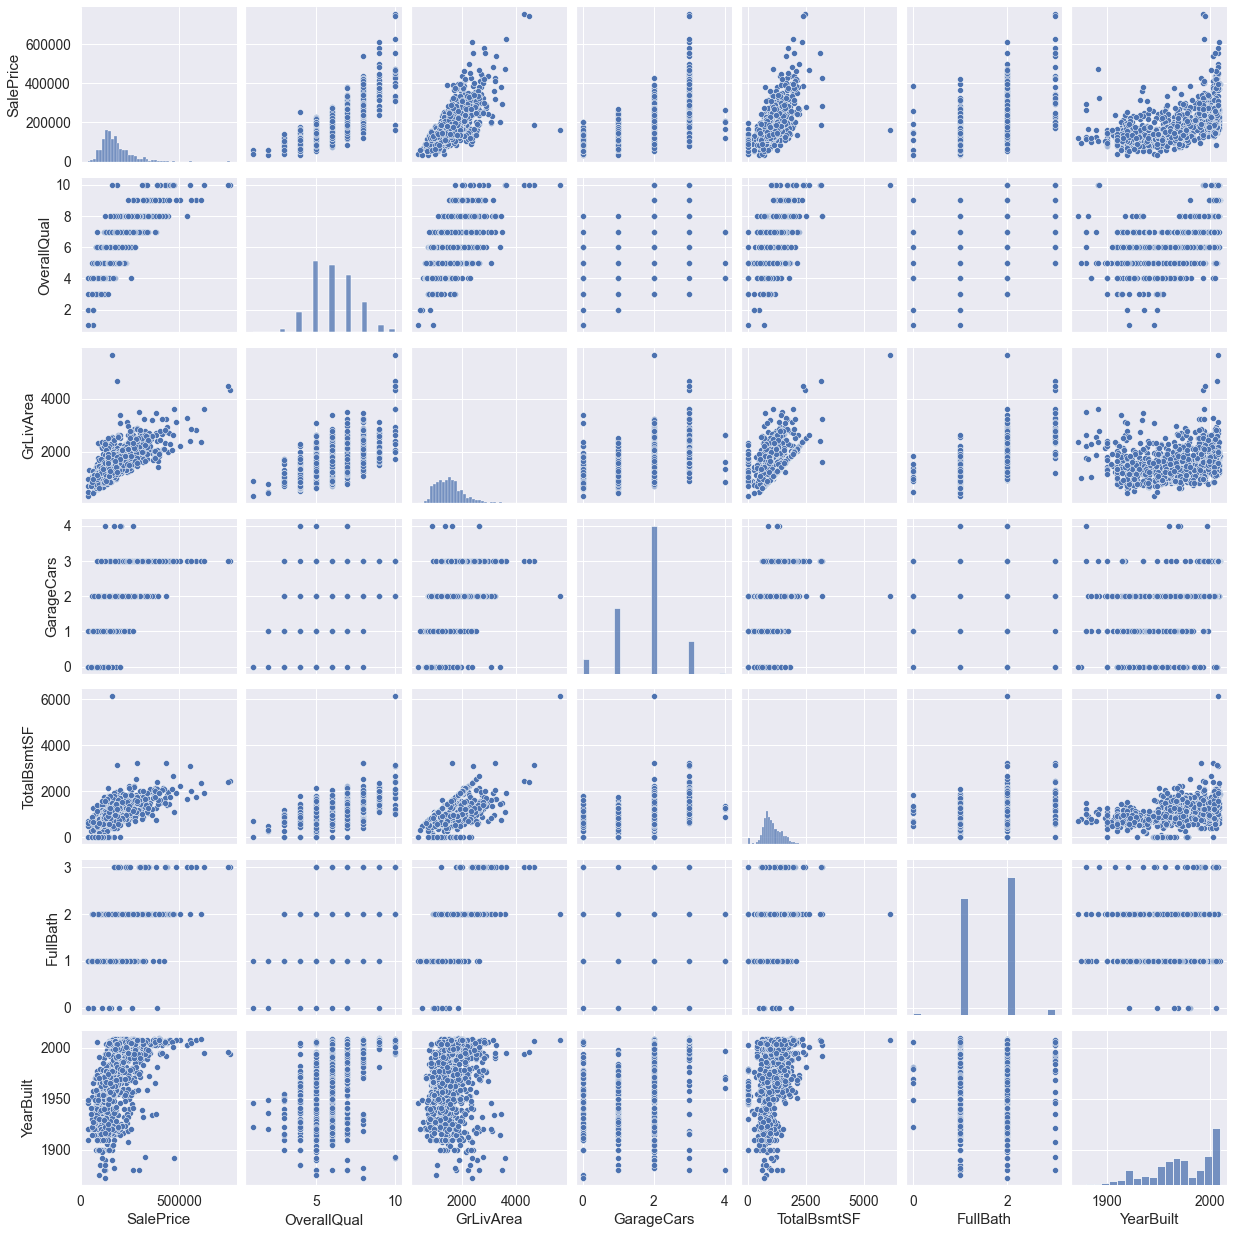

In [14]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height= 2.5)
plt.show()

In [15]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [63]:
df_train_cleaned = df_train.drop((missing_data[missing_data['Total'] >  1]).index,1)
df_train_cleaned = df_train_cleaned.drop(df_train_cleaned[df_train_cleaned['Electrical'].isnull()].index)
df_train_cleaned.isnull().sum().max()


0

In [64]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df_train_cleaned['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()] [:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-4.17823565]
 [-4.14455605]
 [-3.94180818]
 [-3.83839634]
 [-3.78819211]
 [-3.05182383]
 [-3.02530307]
 [-2.89670933]
 [-2.89670933]
 [-2.84739282]]

outer range (high) of the distribution:
[[2.57834563]
 [2.65672527]
 [2.81591038]
 [2.8868082 ]
 [2.89328264]
 [2.99837656]
 [3.10726272]
 [3.15598723]
 [3.54963506]
 [3.57931055]]


<ipython-input-64-f97ec5b8fa94>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df_train_cleaned['SalePrice'][:,np.newaxis])


In [65]:
df_train_cleaned.sort_values(by = 'GrLivArea', ascending = False)[:2]['GrLivArea']

df_train_cleaned = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train_cleaned = df_train.drop(df_train[df_train['Id'] == 524].index)

In [66]:
df_train_cleaned

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,2.505338,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,2.493950,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,2.510994,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2.472277,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,2.520050,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,2.490934,1
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,2.505923,1
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,2.525179,1
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,2.473548,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


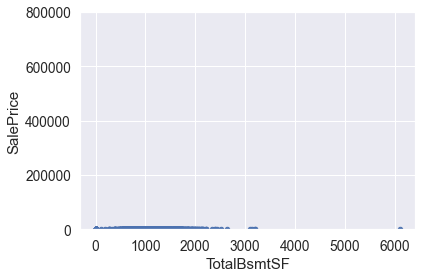

In [67]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


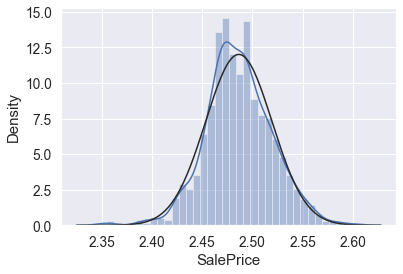

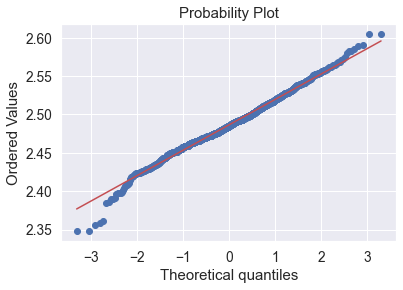

In [68]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df_train_cleaned['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train_cleaned['SalePrice'], plot=plt)

In [69]:
df_train_cleaned['SalePrice'] = np.log(df_train['SalePrice'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


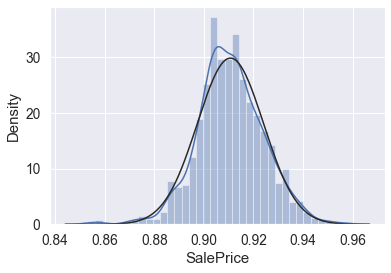

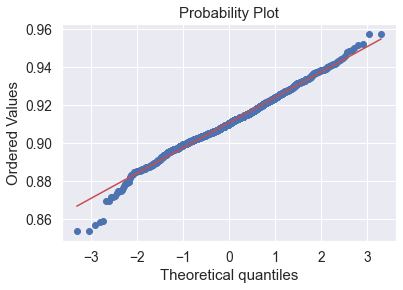

In [70]:
sns.distplot(df_train_cleaned['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train_cleaned['SalePrice'], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


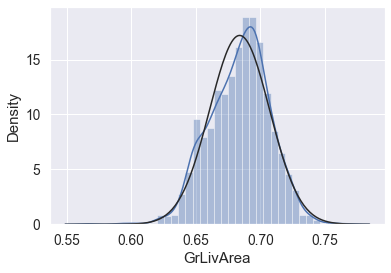

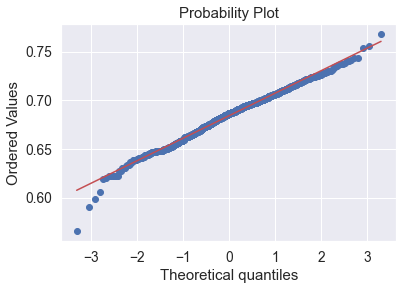

In [71]:
df_train_cleaned['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train_cleaned['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train_cleaned['GrLivArea'], plot=plt)

In [75]:
df_train_cleaned['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)


In [76]:
df_train_cleaned['HasBsmt'] = 0

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


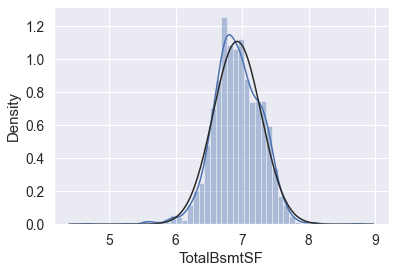

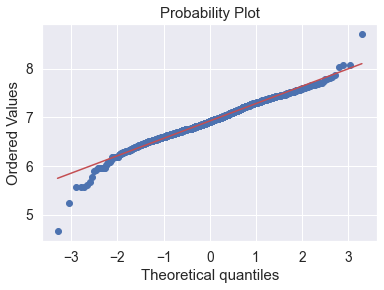

In [77]:
df_train_cleaned.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
df_train_cleaned.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
sns.distplot(df_train_cleaned[df_train_cleaned['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train_cleaned[df_train_cleaned['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

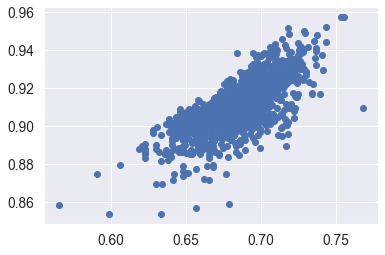

In [78]:
plt.scatter(df_train_cleaned['GrLivArea'], df_train_cleaned['SalePrice']);

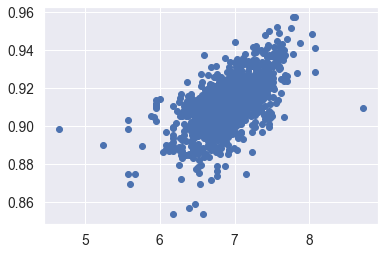

In [79]:
plt.scatter(df_train_cleaned[df_train_cleaned['TotalBsmtSF']>0]['TotalBsmtSF'], df_train_cleaned[df_train_cleaned['TotalBsmtSF']>0]['SalePrice']);

In [81]:

df_train = pd.get_dummies(df_train_cleaned)
df_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0
